# Backtesting with [BT](https://pmorissette.github.io/bt/#what-is-bt)

In [92]:
import bt
%matplotlib inline

## Fixed Weights Strategy Comparison - Traditional 60/40 portfolio vs 58/40/2 (2% allocation in BTC) - Buy and Hold

In [93]:
# Get prices from Yahoo Finance
data = bt.get('spy,agg,btc-usd', start='2014-01-01').ffill()
data

,spy,agg,btcusd
Date,,,
2014-09-17,173.911102,90.539474,457.334015
2014-09-18,174.838089,90.547844,424.440002
2014-09-19,174.680527,90.698082,394.795990
2014-09-22,173.331467,90.823227,402.152008
2014-09-23,172.339264,90.906700,435.790985
...,...,...,...
2022-04-22,426.040009,102.940002,39740.320312
2022-04-25,428.510010,103.629997,40458.308594
2022-04-26,416.100006,103.949997,38117.460938


In [94]:
# Create the BT strategy 58/40/2 portfolio - Buy and Hold
# For the list of available strategies see BT documentation
alt_asset = bt.Strategy('alt_asset', [bt.algos.RunOnce(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighSpecified(spy=0.58,agg=0.4,btcusd=0.02),
                       bt.algos.Rebalance()])

In [95]:
# Create the traditional 60/40 BT strategy - Buy and Hold
sixty_forty = bt.Strategy('sixty_forty', [bt.algos.RunOnce(),
                       bt.algos.SelectThese('spy','agg'),
                       bt.algos.WeighSpecified(spy=0.6,agg=0.4),
                       bt.algos.Rebalance()])

In [96]:
# Create a backtest and run it
test = bt.Backtest(alt_asset, data)
test2 = bt.Backtest(sixty_forty, data)
res = bt.run(test,test2)

<AxesSubplot:title={'center':'alt_asset vs sixty_forty - Buy and Hold'}>

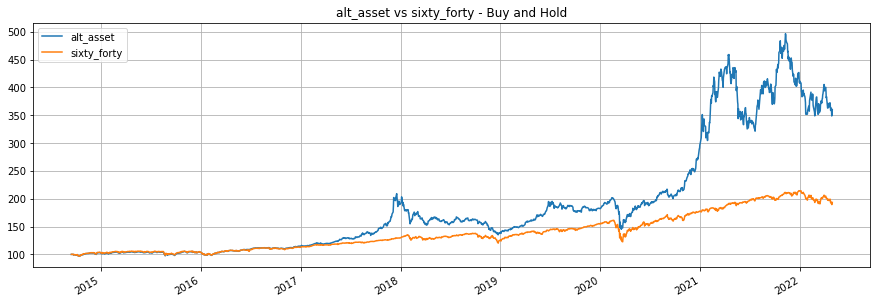

In [109]:
# Plot strategy performance over time 
res.plot(grid=True, title='alt_asset vs sixty_forty - Buy and Hold')


In [98]:
# Display lookback returns
res.display_lookback_returns()

,alt_asset,sixty_forty
mtd,-8.70%,-4.80%
3m,0.23%,-3.91%
6m,-22.33%,-6.75%
ytd,-11.73%,-9.47%
1y,-15.00%,0.78%
3y,30.75%,10.97%
5y,24.26%,10.35%
10y,nan%,nan%
incep,18.30%,9.04%


In [99]:
# Display monthly returns from backtest - alt_asset
res.display_monthly_returns(backtest='alt_asset')

  Year     Jan    Feb     Mar    Apr     May    Jun    Jul    Aug    Sep    Oct    Nov    Dec     YTD
------  ------  -----  ------  -----  ------  -----  -----  -----  -----  -----  -----  -----  ------
  2014    0      0       0      0       0      0      0      0     -0.89   1.58   2.03  -0.33    2.39
  2015   -1.31   2.98   -0.82   0.41    0.59  -1.53   1.77  -3.98  -1.12   5.29   0.26  -0.88    1.38
  2016   -2.63   0.57    4.09   0.49    1.3    1.53   2.25  -0.33   0.16  -0.98   1.32   2.13   10.18
  2017    1.18   3.37   -0.33   1.81    4.53   1.02   2.63   6.46  -0.74   8.48  12.31  11.94   65.71
  2018   -7.86  -1.63   -9.27   5.74   -3.17  -3.11   6.37  -0.09  -0.86  -4.91  -5.16  -5.42  -26.68
  2019    3.96   3.06    2.4    5.88    5.43  13.55  -4.39  -1.29  -2.24   3.42  -1.45   0.26   31.1
  2020    5.6   -5.38  -11.97  13.1     4.51   0.41   8.4    4.14  -3.8    4.29  17.81  17.63   63.86
  2021    7.11  16.99   15.82   0.52  -21.55   0.2   10.21   6.74  -5.45  23.44  -5

In [100]:
# Display monthly returns from backtest - sixty_forty
res.display_monthly_returns(backtest='sixty_forty')

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2014   0      0      0      0      0      0      0      0     -0.61   1.83   1.91  -0.09   3.04
  2015  -0.97   2.95  -0.8    0.46   0.6   -1.66   1.71  -3.84  -1.19   5.02   0.07  -1.13   0.93
  2016  -2.52   0.32   4.31   0.34   1.03   0.98   2.41  -0.01   0.02  -1.37   1.22   1.36   8.2
  2017   1.2    2.71   0.06   0.96   1.15   0.4    1.44   0.52   1.09   1.56   1.95   0.96  14.9
  2018   3.35  -2.79  -1.62   0.03   1.84   0.42   2.48   2.35   0.21  -4.95   1.5   -5.31  -2.91
  2019   5.53   2.12   1.91   2.68  -3.74   4.99   1.08  -0.24   1.1    1.56   2.45   1.98  23.28
  2020   0.59  -4.96  -8.51   8.72   3.38   1.41   4.4    4.5   -2.64  -1.89   7.84   2.64  15
  2021  -0.94   1.54   2.95   4.07   0.54   1.88   2.1    2.17  -3.73   5.23  -0.54   3.41  19.98
  2022  -4.5   -2.52   2.

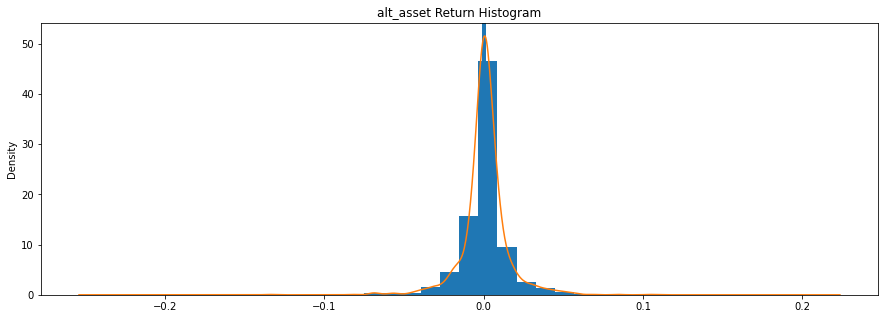

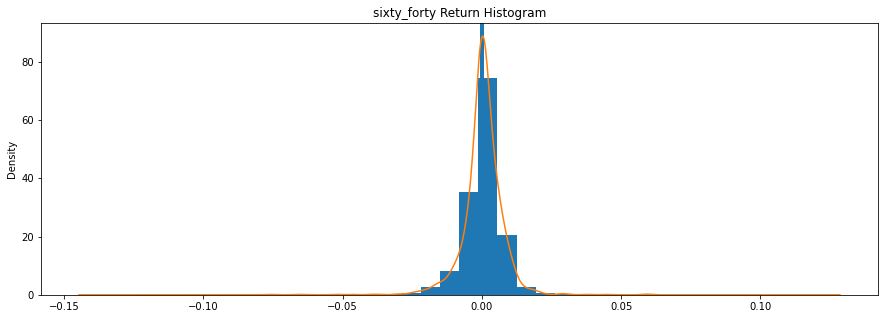

In [101]:
# Display strategy histogram
res.plot_histogram('alt_asset')
res.plot_histogram('sixty_forty')

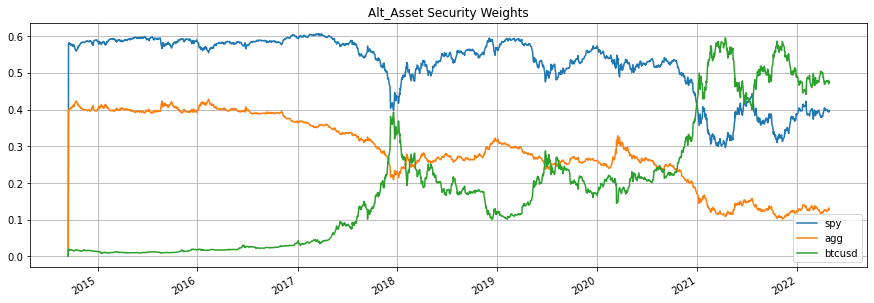

In [102]:
# Plot the security weights over time - alt_asset
res.plot_security_weights(grid=True, title='Alt_Asset Security Weights')

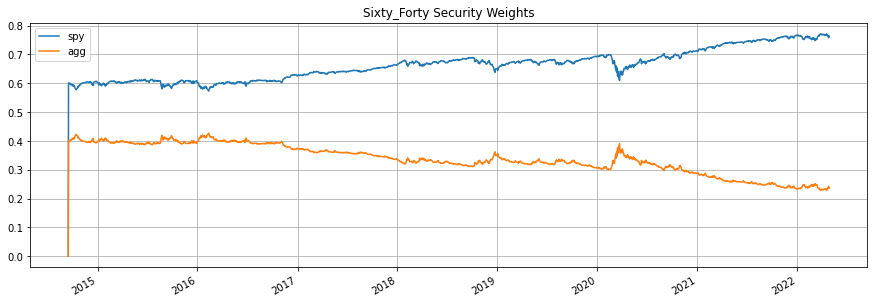

In [103]:
# Plot the security weights over time - sixty_forty
res2 = bt.run(test2)
res2.plot_security_weights(grid=True, title='Sixty_Forty Security Weights')

In [104]:
# Security weights over time - alt_asset
res.get_security_weights().tail()

,spy,agg,btcusd
2022-04-22,0.396353,0.126838,0.476690
2022-04-25,0.394017,0.126203,0.479661
2022-04-26,0.398040,0.131700,0.470138
2022-04-27,0.393475,0.129300,0.477105
2022-04-28,0.396918,0.127168,0.475795


In [105]:
# Security weights over time - sixty_forty
res2.get_security_weights().tail()

,spy,agg
2022-04-22,0.763704,0.236247
2022-04-25,0.763542,0.236410
2022-04-26,0.757629,0.242321
2022-04-27,0.758886,0.241065
2022-04-28,0.763491,0.236461


In [106]:
# List of transactions - alt_asset
res.get_transactions()

price  quantity
Date       Security                      
2014-09-17 agg        90.539474    4417.0
           btcusd    457.334015      43.0
           spy       173.911102    3335.0

In [107]:
# List of transactions - sixty_forty
res2.get_transactions()

price  quantity
Date       Security                      
2014-09-17 agg        90.539474    4417.0
           spy       173.911102    3450.0

In [108]:
# Print strategy stats (set risk-free rate)
res.set_riskfree_rate(0.01)
res.display()

Stat                 alt_asset    sixty_forty
-------------------  -----------  -------------
Start                2014-09-16   2014-09-16
End                  2022-04-28   2022-04-28
Risk-free rate       1.00%        1.00%

Total Return         259.46%      93.32%
Daily Sharpe         0.81         0.71
Daily Sortino        1.26         1.06
CAGR                 18.30%       9.04%
Max Drawdown         -35.33%      -23.98%
Calmar Ratio         0.52         0.38

MTD                  -8.70%       -4.80%
3m                   0.23%        -3.91%
6m                   -22.33%      -6.75%
YTD                  -11.73%      -9.47%
1Y                   -15.00%      0.78%
3Y (ann.)            30.75%       10.97%
5Y (ann.)            24.26%       10.35%
10Y (ann.)           -            -
Since Incep. (ann.)  18.30%       9.04%

Daily Sharpe         0.81         0.71
Daily Sortino        1.26         1.06
Daily Mean (ann.)    19.43%       9.36%
Daily Vol (ann.)     22.83%       11.79%
Daily Skew  